In [1]:
# Import Libraries
from ta import add_all_ta_features
import pandas as pd
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

C:\Users\imaia\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\imaia\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/Yu821/stock_price_prediction/Yu/data/fin_price_news.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
financial = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [3]:
financial.head()

,change,changeOverTime,changePercent,close,fClose,fHigh,fLow,fOpen,fVolume,high,...,researchAndDevelopment,sellingGeneralAndAdmin,symbol_y,totalRevenue,id_y,subkey_y,updated_y,market_news_score,ticker,stock_news_score
0,0.00,0.000000,0.0000,123.00,123.00,124.1800,122.4900,123.66,75089134,124.1800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.023729,AAPL,0.025675
1,-0.85,-0.006911,-0.0069,122.15,122.15,123.5200,121.1500,121.65,118323826,123.5200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,AAPL,0.261900
2,-2.25,-0.025203,-0.0184,119.90,119.90,120.4031,118.8600,120.11,85671919,120.4031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143680,AAPL,-0.511420
3,1.49,-0.013089,0.0124,121.39,121.39,122.5800,120.7299,121.65,80819203,122.5800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038180,AAPL,-0.286350
4,-0.18,-0.014553,-0.0015,121.21,121.21,121.4800,118.9200,120.35,94071234,121.4800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.296000,AAPL,0.038600


In [4]:
# Drop Irrelvant Columns

drop = ['change', 'changeOverTime', 'fClose', 'fHigh',
       'fLow', 'fOpen', 'fVolume', 'id', 'key', 'label',
       'marketChangeOverTime', 'subkey', 'uClose', 'uHigh',
       'uLow', 'uOpen', 'uVolume', 'symbol_x', 'symbol_y','id_x', 'id_y',
       'updated', 'updated_x', 'updated_y', 'subkey_x', 'subkey_y', 'currency_x', 'currency_y', 'reportDate_y']

financial = financial.drop(drop, axis = 1)

In [5]:
financial.columns

Index(['changePercent', 'close', 'high', 'low', 'open', 'symbol', 'volume',
       'date', 'accountsPayable', 'capitalSurplus', 'commonStock',
       'currentAssets', 'currentCash', 'currentLongTermDebt', 'filingType_x',
       'fiscalDate_x', 'fiscalQuarter', 'fiscalYear', 'goodwill',
       'intangibleAssets', 'inventory', 'longTermDebt', 'longTermInvestments',
       'minorityInterest_x', 'netTangibleAssets', 'otherAssets',
       'otherCurrentAssets', 'otherCurrentLiabilities', 'otherLiabilities',
       'propertyPlantEquipment', 'receivables', 'reportDate_x',
       'retainedEarnings', 'shareholderEquity', 'shortTermInvestments',
       'totalAssets', 'totalCurrentLiabilities', 'totalLiabilities',
       'treasuryStock', 'costOfRevenue', 'ebit', 'filingType_y',
       'fiscalDate_y', 'grossProfit', 'incomeTax', 'interestIncome',
       'minorityInterest_y', 'netIncome', 'netIncomeBasic', 'operatingExpense',
       'operatingIncome', 'otherIncomeExpenseNet', 'pretaxIncome',
       

In [6]:
financial['earnings_day'] = (financial['reportDate_x'] == financial['date'])

financial['earnings_day'] = financial['earnings_day'].astype('int') 

financial['earnings_day'].head()

0    0
1    0
2    0
3    0
4    0
Name: earnings_day, dtype: int32

In [22]:
finance = financial[['date', 'earnings_day', 'market_news_score', 'stock_news_score',
                     "open", "high", "low", "close", "volume", 'ticker']]

finance = finance[finance['ticker'] == "AAPL"]

finance['date'] = pd.DatetimeIndex(finance['date'])

finance['date'] = finance['date'].dt.strftime('%Y-%m-%d')

finance = finance.loc[(finance['date'] >= '2020-04-01')
                     & (finance['date'] <= '2021-04-01')]


print(finance.shape)
finance.head()

(176, 10)


,date,earnings_day,market_news_score,stock_news_score,open,high,low,close,volume,ticker
0,2021-04-01,0,-0.023729,0.025675,123.66,124.1800,122.4900,123.00,75089134,AAPL
1,2021-03-31,0,0.000000,0.261900,121.65,123.5200,121.1500,122.15,118323826,AAPL
2,2021-03-30,0,0.143680,-0.511420,120.11,120.4031,118.8600,119.90,85671919,AAPL
3,2021-03-29,0,0.038180,-0.286350,121.65,122.5800,120.7299,121.39,80819203,AAPL
4,2021-03-26,0,0.296000,0.038600,120.35,121.4800,118.9200,121.21,94071234,AAPL


In [33]:
technical = add_all_ta_features(finance, open="open", high="high", low="low", close="close",
                                     volume="volume", fillna=True)

print(technical.shape)

technical.head()

(176, 93)


C:\Users\imaia\Anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\imaia\Anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,date,earnings_day,market_news_score,stock_news_score,open,high,low,close,volume,ticker,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
0,2021-04-01,0,-0.023729,0.025675,123.66,124.1800,122.4900,123.00,75089134,AAPL,...,-69.822485,0.0,123.000000,0.0,0.000000,0.000000,0.000000,4.395958,0.000000,0.000000
1,2021-03-31,0,0.000000,0.261900,121.65,123.5200,121.1500,122.15,118323826,AAPL,...,-66.996700,0.0,122.854715,0.0,4.405219,0.881044,3.524175,-0.691057,-0.693456,-0.691057
2,2021-03-30,0,0.143680,-0.511420,120.11,120.4031,118.8600,119.90,85671919,AAPL,...,-80.451128,0.0,122.467422,0.0,4.448408,1.594517,2.853891,-1.841998,-1.859174,-2.520325
3,2021-03-29,0,0.038180,-0.286350,121.65,122.5800,120.7299,121.39,80819203,AAPL,...,-52.443609,0.0,122.332669,0.0,3.957101,2.067033,1.890067,1.242702,1.235044,-1.308943
4,2021-03-26,0,0.296000,0.038600,120.35,121.4800,118.9200,121.21,94071234,AAPL,...,-55.827068,0.0,122.179287,0.0,4.803991,2.614425,2.189566,-0.148282,-0.148392,-1.455285


In [34]:

drop = ["high", "low", "close", "volume", 'ticker', 'date']

technical = technical.drop(drop, axis = 1)

print(technical.shape)
technical.head()

(176, 87)


,earnings_day,market_news_score,stock_news_score,open,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
0,0,-0.023729,0.025675,123.66,-2.976906e+07,75089134,-0.396450,0.000000e+00,50.000000,0.000000,...,-69.822485,0.0,123.000000,0.0,0.000000,0.000000,0.000000,4.395958,0.000000,0.000000
1,0,0.000000,0.261900,121.65,-4.824156e+07,-43234692,-0.249423,-1.005753e+08,0.000000,-2.002978,...,-66.996700,0.0,122.854715,0.0,4.405219,0.881044,3.524175,-0.691057,-0.693456,-0.691057
2,0,0.143680,-0.511420,120.11,-1.843322e+07,-128906611,-0.066049,-1.137448e+08,0.000000,-4.869383,...,-80.451128,0.0,122.467422,0.0,4.448408,1.594517,2.853891,-1.841998,-1.859174,-2.520325
3,0,0.038180,-0.286350,121.65,-4.158121e+07,-48087408,-0.115534,-8.029257e+07,28.437225,4.631934,...,-52.443609,0.0,122.332669,0.0,3.957101,2.067033,1.890067,1.242702,1.235044,-1.308943
4,0,0.296000,0.038600,120.35,3.264687e+07,-142158642,0.071913,-7.124117e+07,21.410401,-3.959417,...,-55.827068,0.0,122.179287,0.0,4.803991,2.614425,2.189566,-0.148282,-0.148392,-1.455285


In [35]:
technical.iloc[:,0:20].head()

,earnings_day,market_news_score,stock_news_score,open,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp
0,0,-0.023729,0.025675,123.66,-2.976906e+07,75089134,-0.396450,0.000000e+00,50.000000,0.000000,0.000000,2.708871e+06,1000.000000,123.223333,0.0,123.000000,123.000000,123.000000,0.000000,0.000000
1,0,0.000000,0.261900,121.65,-4.824156e+07,-43234692,-0.249423,-1.005753e+08,0.000000,-2.002978,-2.002978,2.483202e+06,1000.000000,122.642154,0.0,122.575000,123.425000,121.725000,1.386906,0.250000
2,0,0.143680,-0.511420,120.11,-1.843322e+07,-128906611,-0.066049,-1.137448e+08,0.000000,-4.869383,-3.436180,-2.395760e+06,981.580025,121.745445,0.0,121.683333,124.299098,119.067569,4.299297,0.159118
3,0,0.038180,-0.286350,121.65,-4.158121e+07,-48087408,-0.115534,-8.029257e+07,28.437225,4.631934,-0.746809,-5.737326e+05,993.778142,121.705291,0.0,121.610000,123.889517,119.330483,3.748898,0.451744
4,0,0.296000,0.038600,120.35,3.264687e+07,-142158642,0.071913,-7.124117e+07,21.410401,-3.959417,-1.549961,8.648510e+05,993.778142,121.463133,0.0,121.530000,123.593822,119.466178,3.396399,0.422474


In [37]:
# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choosing between Standardization or normalization
#sc = StandardScaler()
sc = MinMaxScaler()
 
DataScaler = sc.fit(technical)
transformed = DataScaler.transform(technical)

transformed = pd.DataFrame(transformed, columns = technical.columns)

transformed.head()

,earnings_day,market_news_score,stock_news_score,open,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
0,0.0,0.464135,0.492072,0.753447,0.535666,0.757804,0.000000,0.515512,0.641811,0.364857,...,0.301836,0.631569,0.743799,0.537946,0.409339,0.414128,0.514246,0.815853,0.655564,0.740014
1,0.0,0.479989,0.667508,0.728594,0.523391,0.721153,0.194799,0.425995,0.000000,0.335207,...,0.330112,0.631569,0.741258,0.537946,0.567042,0.455310,0.728319,0.598351,0.626941,0.729052
2,0.0,0.575987,0.093190,0.709552,0.543199,0.694615,0.437755,0.414274,0.000000,0.292775,...,0.195478,0.631569,0.734486,0.537946,0.568588,0.488659,0.687603,0.549141,0.578826,0.700035
3,0.0,0.505499,0.260342,0.728594,0.527817,0.719649,0.372191,0.444048,0.365026,0.433424,...,0.475740,0.631569,0.732130,0.537946,0.551000,0.510746,0.629057,0.681032,0.706541,0.719251
4,0.0,0.677758,0.501671,0.712519,0.577141,0.690510,0.620544,0.452104,0.274829,0.306246,...,0.441883,0.631569,0.729448,0.537946,0.581318,0.536332,0.647249,0.621558,0.649439,0.716929


In [38]:
Y = transformed[['open']]
X = transformed.drop(['open'], axis = 1)

In [39]:
Y = Y.to_numpy()
X = X.to_numpy()

In [40]:
X.shape

(176, 86)

In [41]:
# split into samples
X_samples_1 = list()
y_samples_1 = list()
 
NumerOfRows = X.shape[0]

TimeSteps = 5  # next day's Price Prediction is based on last how many past day's prices
FutureTimeSteps = 1 # How many days in future you want to predict the prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = Y[i:i+FutureTimeSteps]
    X_samples_1.append(x_sample)
    y_samples_1.append(y_sample)

# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data_1 = np.array(X_samples_1)
X_data_1 = X_data_1.reshape(X_data_1.shape[0], X_data_1.shape[1], X.shape[1])
print('\n#### Input Data shape ####')
print(X_data_1.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data_1 = np.array(y_samples_1)
y_data_1 = y_data_1.reshape(y_data_1.shape[0], FutureTimeSteps)
print('\n#### Output Data shape ####')
print(y_data_1.shape)


#### Input Data shape ####
(170, 5, 86)

#### Output Data shape ####
(170, 1)


In [42]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_data_1, y_data_1)

In [43]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [44]:
# Defining Input shapes for LSTM
TimeSteps = X_train_1.shape[1]
TotalFeatures = X_train_1.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 5
Number of Features: 86


In [171]:
# Initialising the RNN
regressor = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor.add(Dense(units = FutureTimeSteps))
 
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
###################################################################
 
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor.fit(X_train_1, y_train_1, batch_size = 30, epochs = 100)
 
EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/100
185/185 [==============================] - 1s 5ms/step - loss: nan
Epoch 2/100
185/185 [==============================] - 0s 237us/step - loss: nan
Epoch 3/100
185/185 [==============================] - 0s 248us/step - loss: nan
Epoch 4/100
185/185 [==============================] - 0s 248us/step - loss: nan
Epoch 5/100
185/185 [==============================] - 0s 243us/step - loss: nan
Epoch 6/100
185/185 [==============================] - 0s 253us/step - loss: nan
Epoch 7/100
185/185 [==============================] - 0s 253us/step - loss: nan
Epoch 8/100
185/185 [==============================] - 0s 242us/step - loss: nan
Epoch 9/100
185/185 [==============================] - 0s 226us/step - loss: nan
Epoch 10/100
185/185 [==============================] - 0s 270us/step - loss: nan
Epoch 11/100
185/185 [==============================] - 0s 259us/step - loss: nan
Epoch 12/100
185/185 [==============================] - 0s 275us/step - loss: nan
Epoch 13/100
185/185 [=====

(247,)
(247,)


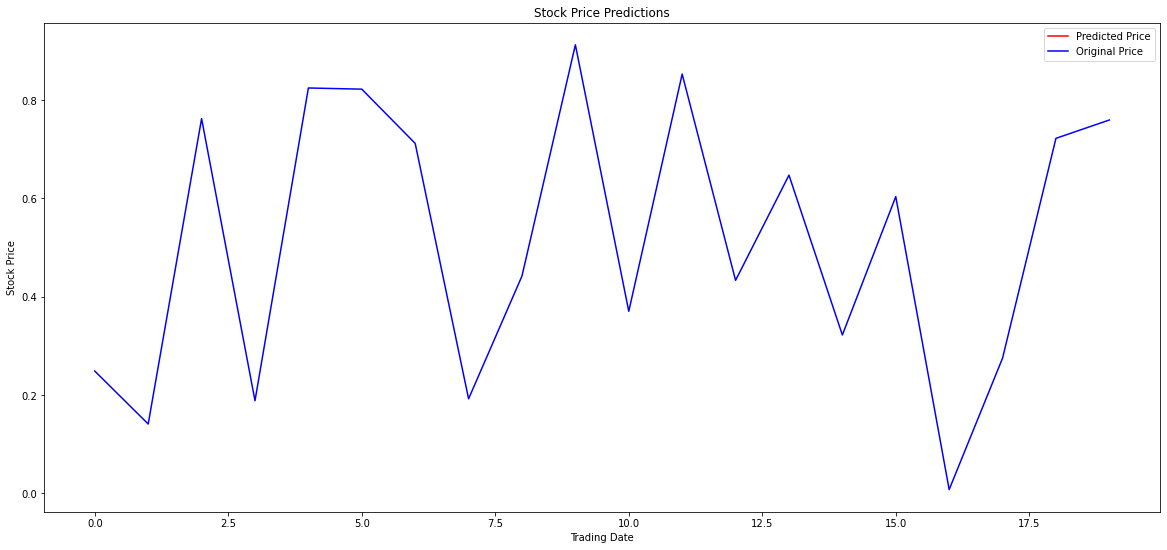

In [141]:

# Generating predictions on full data
TrainPredictions = regressor.predict(X_train_1)
TestPredictions = regressor.predict(X_test_1)

 
FullDataPredictions = np.append(TrainPredictions, TestPredictions)
FullDataOrig = np.append(y_train_1, y_test_1)
#print(data['date'].iloc[TimeSteps+1:])
print(FullDataPredictions.shape)
print(FullDataOrig.shape)
 
# plotting the full data
plt.plot(FullDataPredictions[20:40], color = 'red', label = 'Predicted Price')
plt.plot(FullDataOrig[20:40] , color = 'blue', label = 'Original Price')
 
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(9)
plt.show()

In [176]:
y_pred = regressor.predict(X_test_1)

percentages = [1,2,3]

total = len(y_test_1)

for percent in percentages:
    
    correct = 0
    
    for i in range(len(y_test_1)):
        upper = y_test_1[i] + (( percent / 100) * y_test_1[i] )
        lower = y_test_1[i] - (( percent / 100) * y_test_1[i] )
        if y_pred[i] < upper and y_pred[i] > lower:
            correct = correct + 1
        else:
            pass
        
    print("{}% of the predictions were {}% away from actual price".format(round((correct/total)*100,2),percent))
    

0.0% of the predictions were 1% away from actual price
0.0% of the predictions were 2% away from actual price
0.0% of the predictions were 3% away from actual price
